## Algerian fire dataset
Agenda for the jupyter notebook
- importing important libraries and reading the dataset
- Understanding the data
- Data Cleaning
- Exploratory data analysis

# 1. Importing data and required packages

## 1.1 Importing important libraries for EDA

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
%matplotlib inline

## 1.2 Reading the data set from the local library

In [123]:
#reading the dataset from first row and rows in the indexes [124,125,126]
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header = 1,skiprows =[124,125,126])

### checking the first 5 rows

In [124]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


### Shape  of the dataset

In [125]:
df.shape

(244, 14)

### Descriptive statistics

In [126]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000


### Datatypes of the variables

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 26.8+ KB


In [128]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

## Initial observations
- There are no null values in the variables, only one of the output variable is empty
- Some of the FWI components are in object datatype whereas the values are integers

## 2. Understanding the dataset
- The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the   northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
- The period from June 2012 to September 2012
- The dataset includes 11 attribues and 1 output attribue (class)

### 2.1 Variable information
- 1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations 
- 2. Temp : temperature noon (temperature max)  in Celsius degrees: 22 to 42
- 3. RH : Relative Humidity in %: 21 to 90 
- 4. Ws :Wind speed in km/h: 6 to 29 
- 5. Rain: total day in mm: 0 to 16.8
###### FWI COMPONENTS
- 6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 
- 7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 
- 8. Drought Code (DC) index from the FWI system:  7 to 220.4
- 9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 
- 10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
- 11. Fire Weather Index (FWI) Index: 0 to 31.1
###### OUTPUT 
- 12. 12. Classes: two classes, namely fire and not fire

## 3. Data Cleaning

### 3.1 Resetting the index

In [131]:
df.reset_index(drop = True,inplace=True)

### 3.2 Creating a new column Region with Bejaia Region-0 and Sidi-Bel Abbes Region as 1

In [133]:
df.loc[120:128]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire
121,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire
127,6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire
128,7,6,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6,fire


In [134]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [135]:
# checking the columns
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

### 3.3. Removing the spaces in column headers

In [136]:
df.columns = df.columns.str.strip()

In [137]:
# all the white spaces have been removed
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

### 3.4 Dropping the Year column since it is same 2012 along the dataset

In [138]:
df.drop(['year'],axis =1, inplace =True)

### 3.5 Converting the data types of the variables

In [139]:
df['DC'].unique()

array(['7.6', '7.1', '6.9', '14.2', '22.2', '30.5', '38.3', '38.8',
       '46.3', '54.3', '61.4', '17', '7.8', '7.4', '8', '16', '27.1',
       '31.6', '39.5', '47.7', '55.8', '63.8', '71.8', '80.3', '88.5',
       '84.4', '92.8', '8.6', '8.3', '9.2', '18.5', '27.9', '37', '40.4',
       '49.8', '9.3', '18.7', '27.7', '37.2', '22.9', '25.5', '34.1',
       '43.1', '52.8', '62.1', '71.5', '79.9', '71.3', '79.7', '88.7',
       '98.6', '108.5', '117.8', '127', '136', '145.7', '10.2', '10',
       '19.8', '29.7', '39.1', '48.6', '47', '57', '67', '77', '75.1',
       '85.1', '94.7', '92.5', '90.4', '100.7', '110.9', '120.9', '130.6',
       '141.1', '151.3', '161.5', '171.3', '181.3', '190.6', '200.2',
       '210.4', '220.4', '180.4', '8.7', '7.5', '7', '15.7', '24', '32.2',
       '30.1', '8.4', '8.9', '16.6', '7.3', '24.3', '33.1', '41.3',
       '49.3', '57.9', '41.4', '30.4', '15.2', '7.7', '16.3', '24.9',
       '8.8', '8.2', '15.4', '17.6', '26.3', '28.9', '14.7', '22.5',
       '

In [140]:
df['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '7.1 ', '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6',
       '15', '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8',
       '0.6', '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1',
       '1.3', '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6',
       '9.9', '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1',
       '17.2', '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7',
       '13.2', '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1',
       '1', '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire   ', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5',

In [141]:
# checking out the index with the value fire   fro the column FWI
df[df['FWI']=="fire   "]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,7,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [142]:
#dropping the row at 165 index
df.drop(165,inplace =True)

In [143]:
# resetting the index
df.reset_index(drop = True, inplace=True)

In [144]:
df.iloc[160:168]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
160,9,7,36,43,15,1.9,82.3,9.4,9.9,3.2,9.0,3.1,fire,1.0
161,10,7,34,51,16,3.8,77.5,8.0,9.5,2.0,7.7,1.3,not fire,1.0
162,11,7,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,not fire,1.0
163,12,7,36,44,13,0.0,90.1,12.6,19.4,8.3,12.5,9.6,fire,1.0
164,13,7,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,fire,1.0
165,15,7,34,45,17,0.0,90.5,18.0,24.1,10.9,17.7,14.1,fire,1.0
166,16,7,31,83,17,0.0,84.5,19.4,33.1,4.7,19.2,7.3,fire,1.0
167,17,7,32,81,17,0.0,84.6,21.1,42.3,4.7,20.9,7.7,fire,1.0


In [145]:
# Converting DC and DWI datatypes to float
df[['DC','FWI']]= df[['DC','FWI']].astype(float)

In [146]:
# Converting Region datatype to int
df[['Region']]= df[['Region']].astype('int64')

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   Temperature  243 non-null    int64  
 3   RH           243 non-null    int64  
 4   Ws           243 non-null    int64  
 5   Rain         243 non-null    float64
 6   FFMC         243 non-null    float64
 7   DMC          243 non-null    float64
 8   DC           243 non-null    float64
 9   ISI          243 non-null    float64
 10  BUI          243 non-null    float64
 11  FWI          243 non-null    float64
 12  Classes      243 non-null    object 
 13  Region       243 non-null    int64  
dtypes: float64(7), int64(6), object(1)
memory usage: 26.7+ KB


### 3.6 Removing the white spaces in the Classes column

In [148]:
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [149]:
df.Classes = df.Classes.str.strip()

In [150]:
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [151]:
# checking out the final descriptive statistics
df.describe()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


### 3.7 Encoding the values in the Classes column to  0 and 1

In [152]:
# Not fire-0 and Fire-1
df['Classes'] = np.where(df['Classes']=="not fire",0,1)

In [153]:
df.Classes.unique()

array([0, 1])

## 4.Exploratory Data Analysis

In [154]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [155]:
df.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
Temperature,0.097227,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.180543,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197


### 4.1 Univariate Analysis

In [164]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype!='O']`

In [165]:
numerical_feature

['day',
 'month',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes',
 'Region']

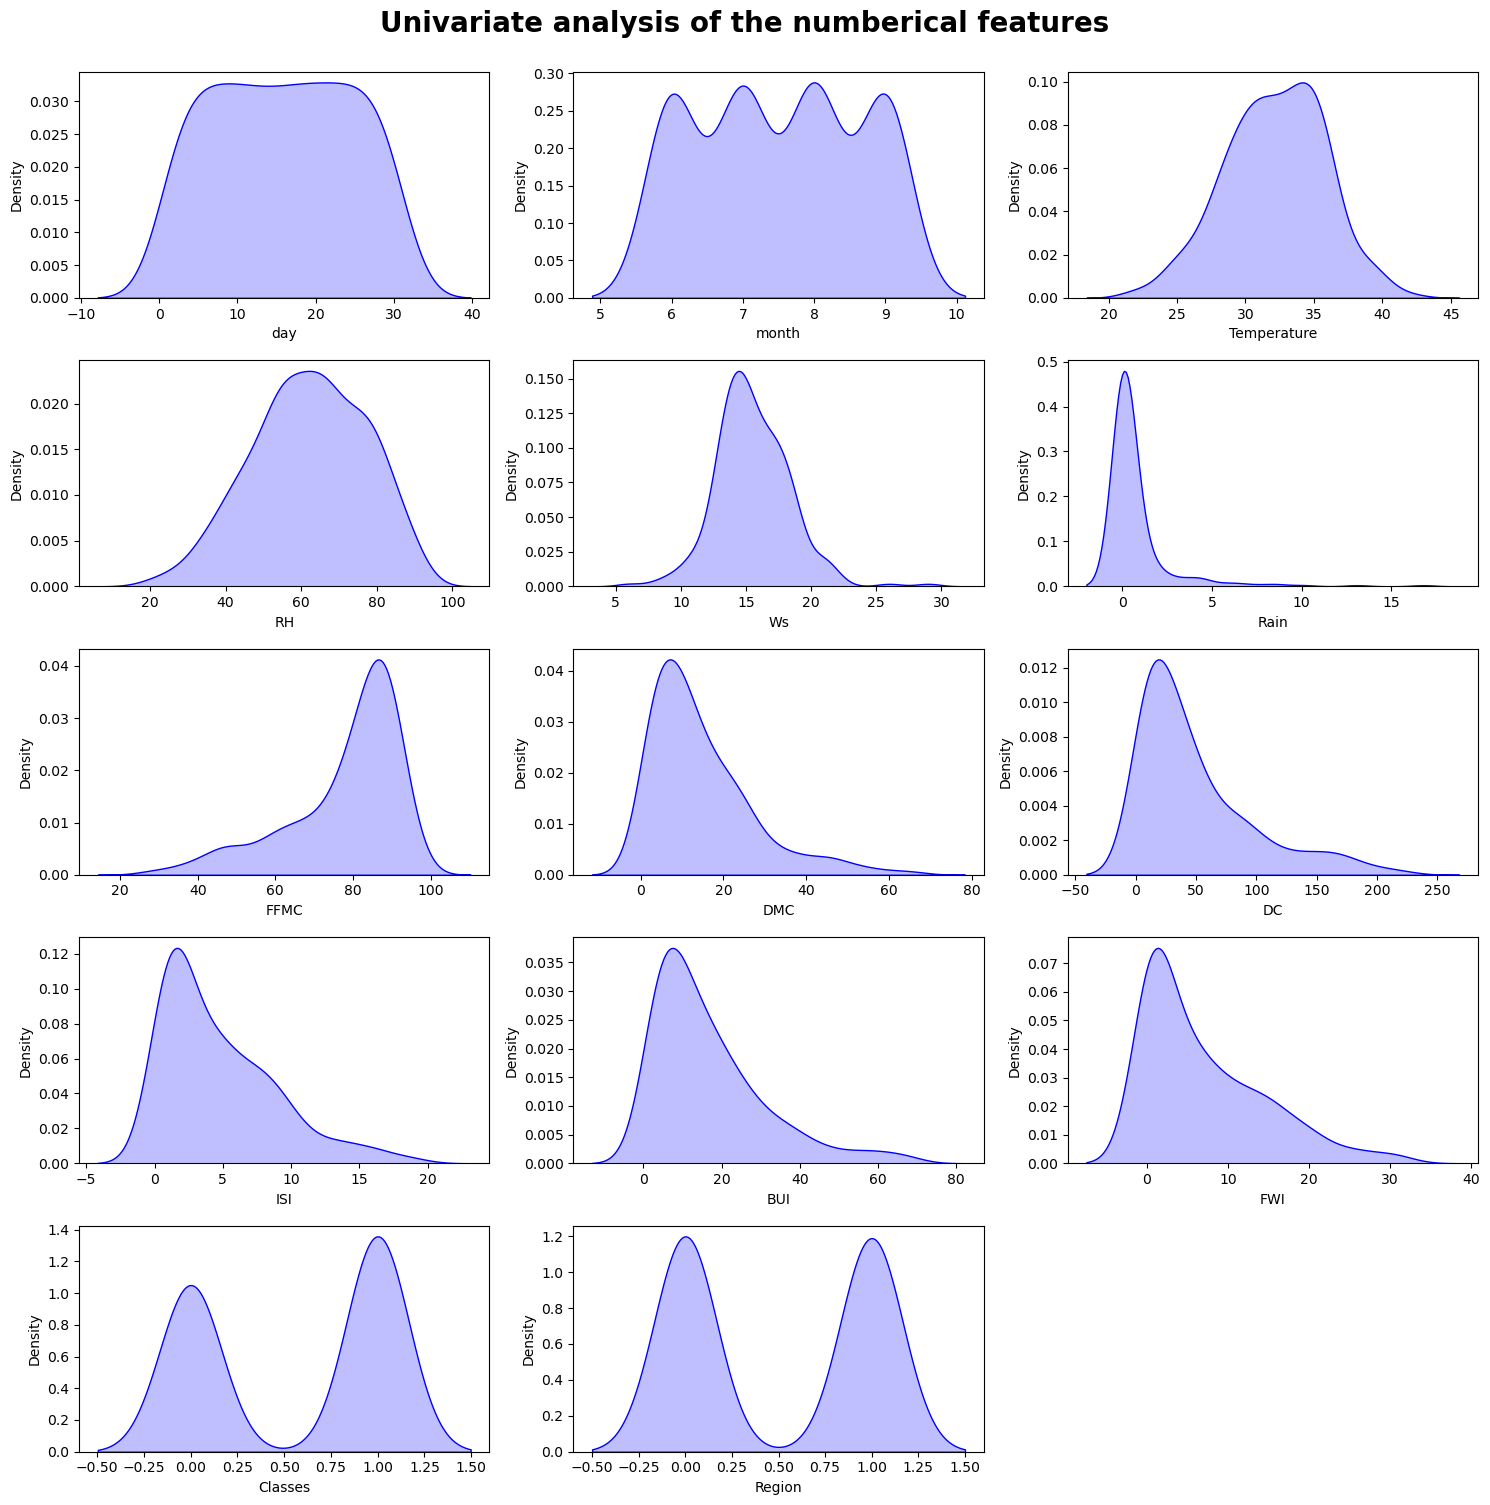

In [177]:
plt.figure(figsize = (15,15))
plt.suptitle("Univariate analysis of the numberical features",fontsize = 20,fontweight = "bold",y = 1.0)
for i in range(0,len(numerical_feature)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x= df[numerical_feature[i]],shade=True,color='b')
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

### Observations
- Day feature is spread almost uniformly across all the dates
- Month we have the data for is  6,7,8,9 month
- Temperature is left skewed 
- Relative Humidity is also left skewed 
- Windspeed data is right skewed 
- Rain data is right skewed 
##### FWI components
- FFMC is left skewed
- DMC is right skewed
- DC is right skewed
- ISI is right skewed
- BUI is right skewed
- FWI is right skewed

#### 4.1.1 Checking the Classes

([<matplotlib.axis.XTick at 0x126f6085150>,
 [Text(0, 0, 'Not Fire'), Text(1, 0, 'Fire')])

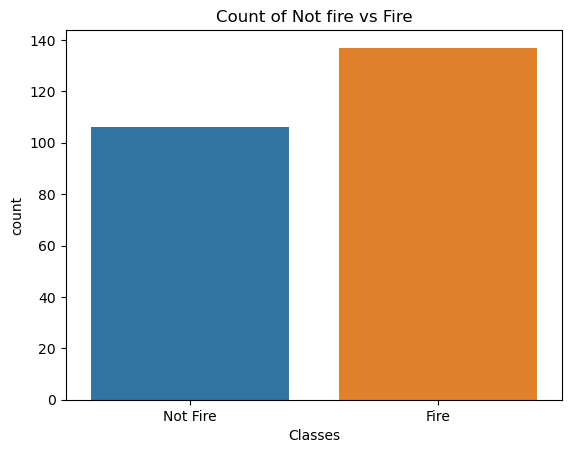

In [187]:
# plt.subplot(1,2)
sns.countplot(data = df,x ='Classes' )
plt.title("Count of Not fire vs Fire")
plt.xticks([0,1],['Not Fire','Fire'])

In [219]:
df.Classes.value_counts(normalize = True)*100

1    56.378601
0    43.621399
Name: Classes, dtype: float64

### Observation
#### Clearly between June 2012 to September 2012 
- Fire - 56.37%
- Not fire - 43.62%

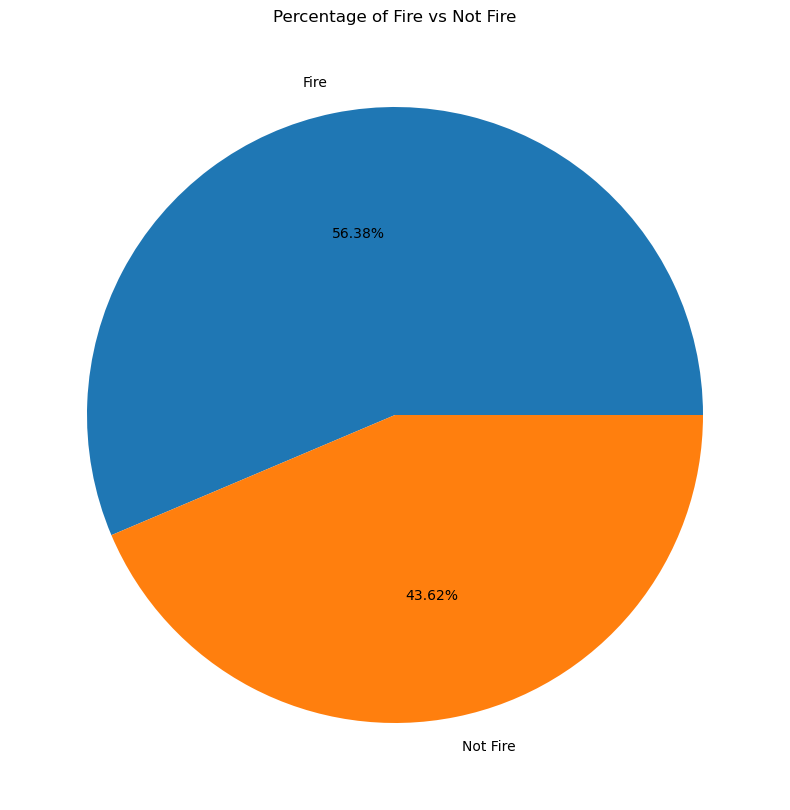

In [230]:
plt.figure(figsize = (20,10))
plt.title("Percentage of Fire vs Not Fire")
plt.pie(df['Classes'].value_counts(),labels=['Fire','Not Fire'],autopct='%1.2f%%')
plt.show()

### 4.1.2 Finding out the histogram of each column

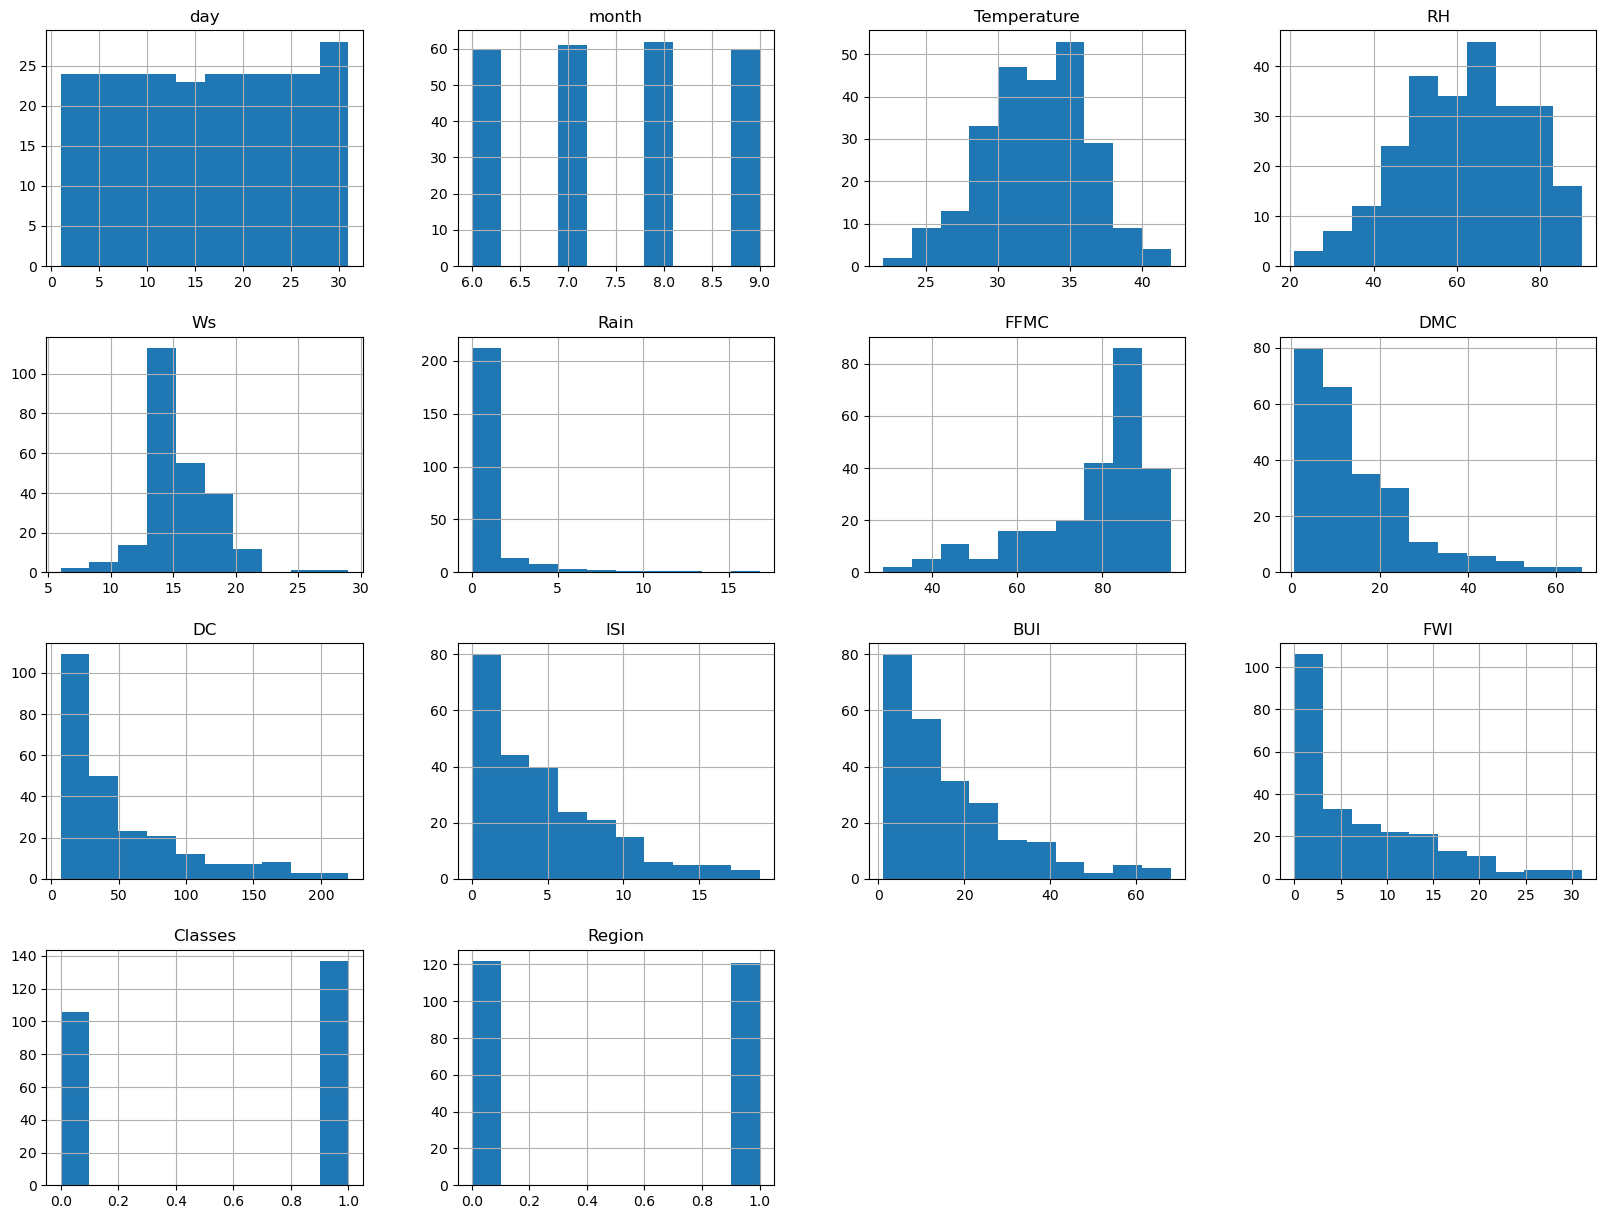

In [234]:
df.hist(figsize = (20,15))
plt.show()

### 4.1.3 Plotting boxplots

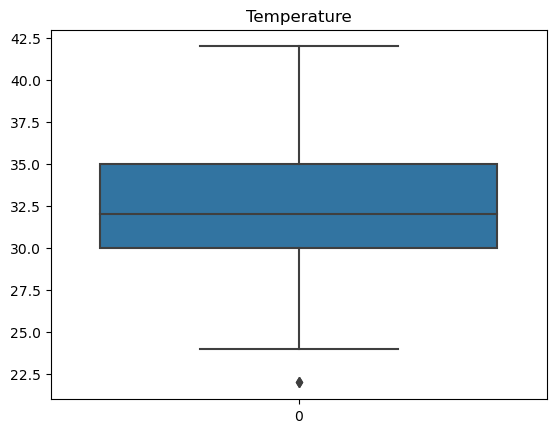

In [237]:
sns.boxplot(df['Temperature'])
plt.title("Temperature")
plt.show()

- Observation(It has an outlier however temperature is small so we can ignore that)

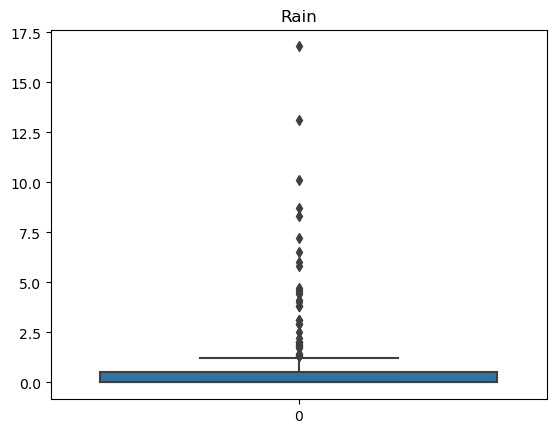

In [238]:
sns.boxplot(df['Rain'])
plt.title("Rain")
plt.show()

- Observation(Many outliers are there)

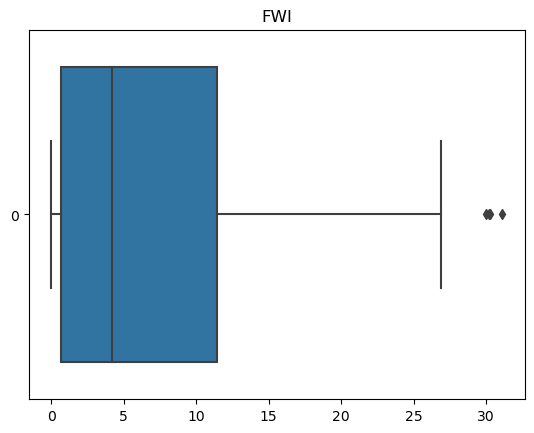

In [240]:
sns.boxplot(df['FWI'],orient='h')
plt.title("FWI")
plt.show()

## 4.2 Bivaraite Analysis

### 4.2..1 Plotting various Graphs

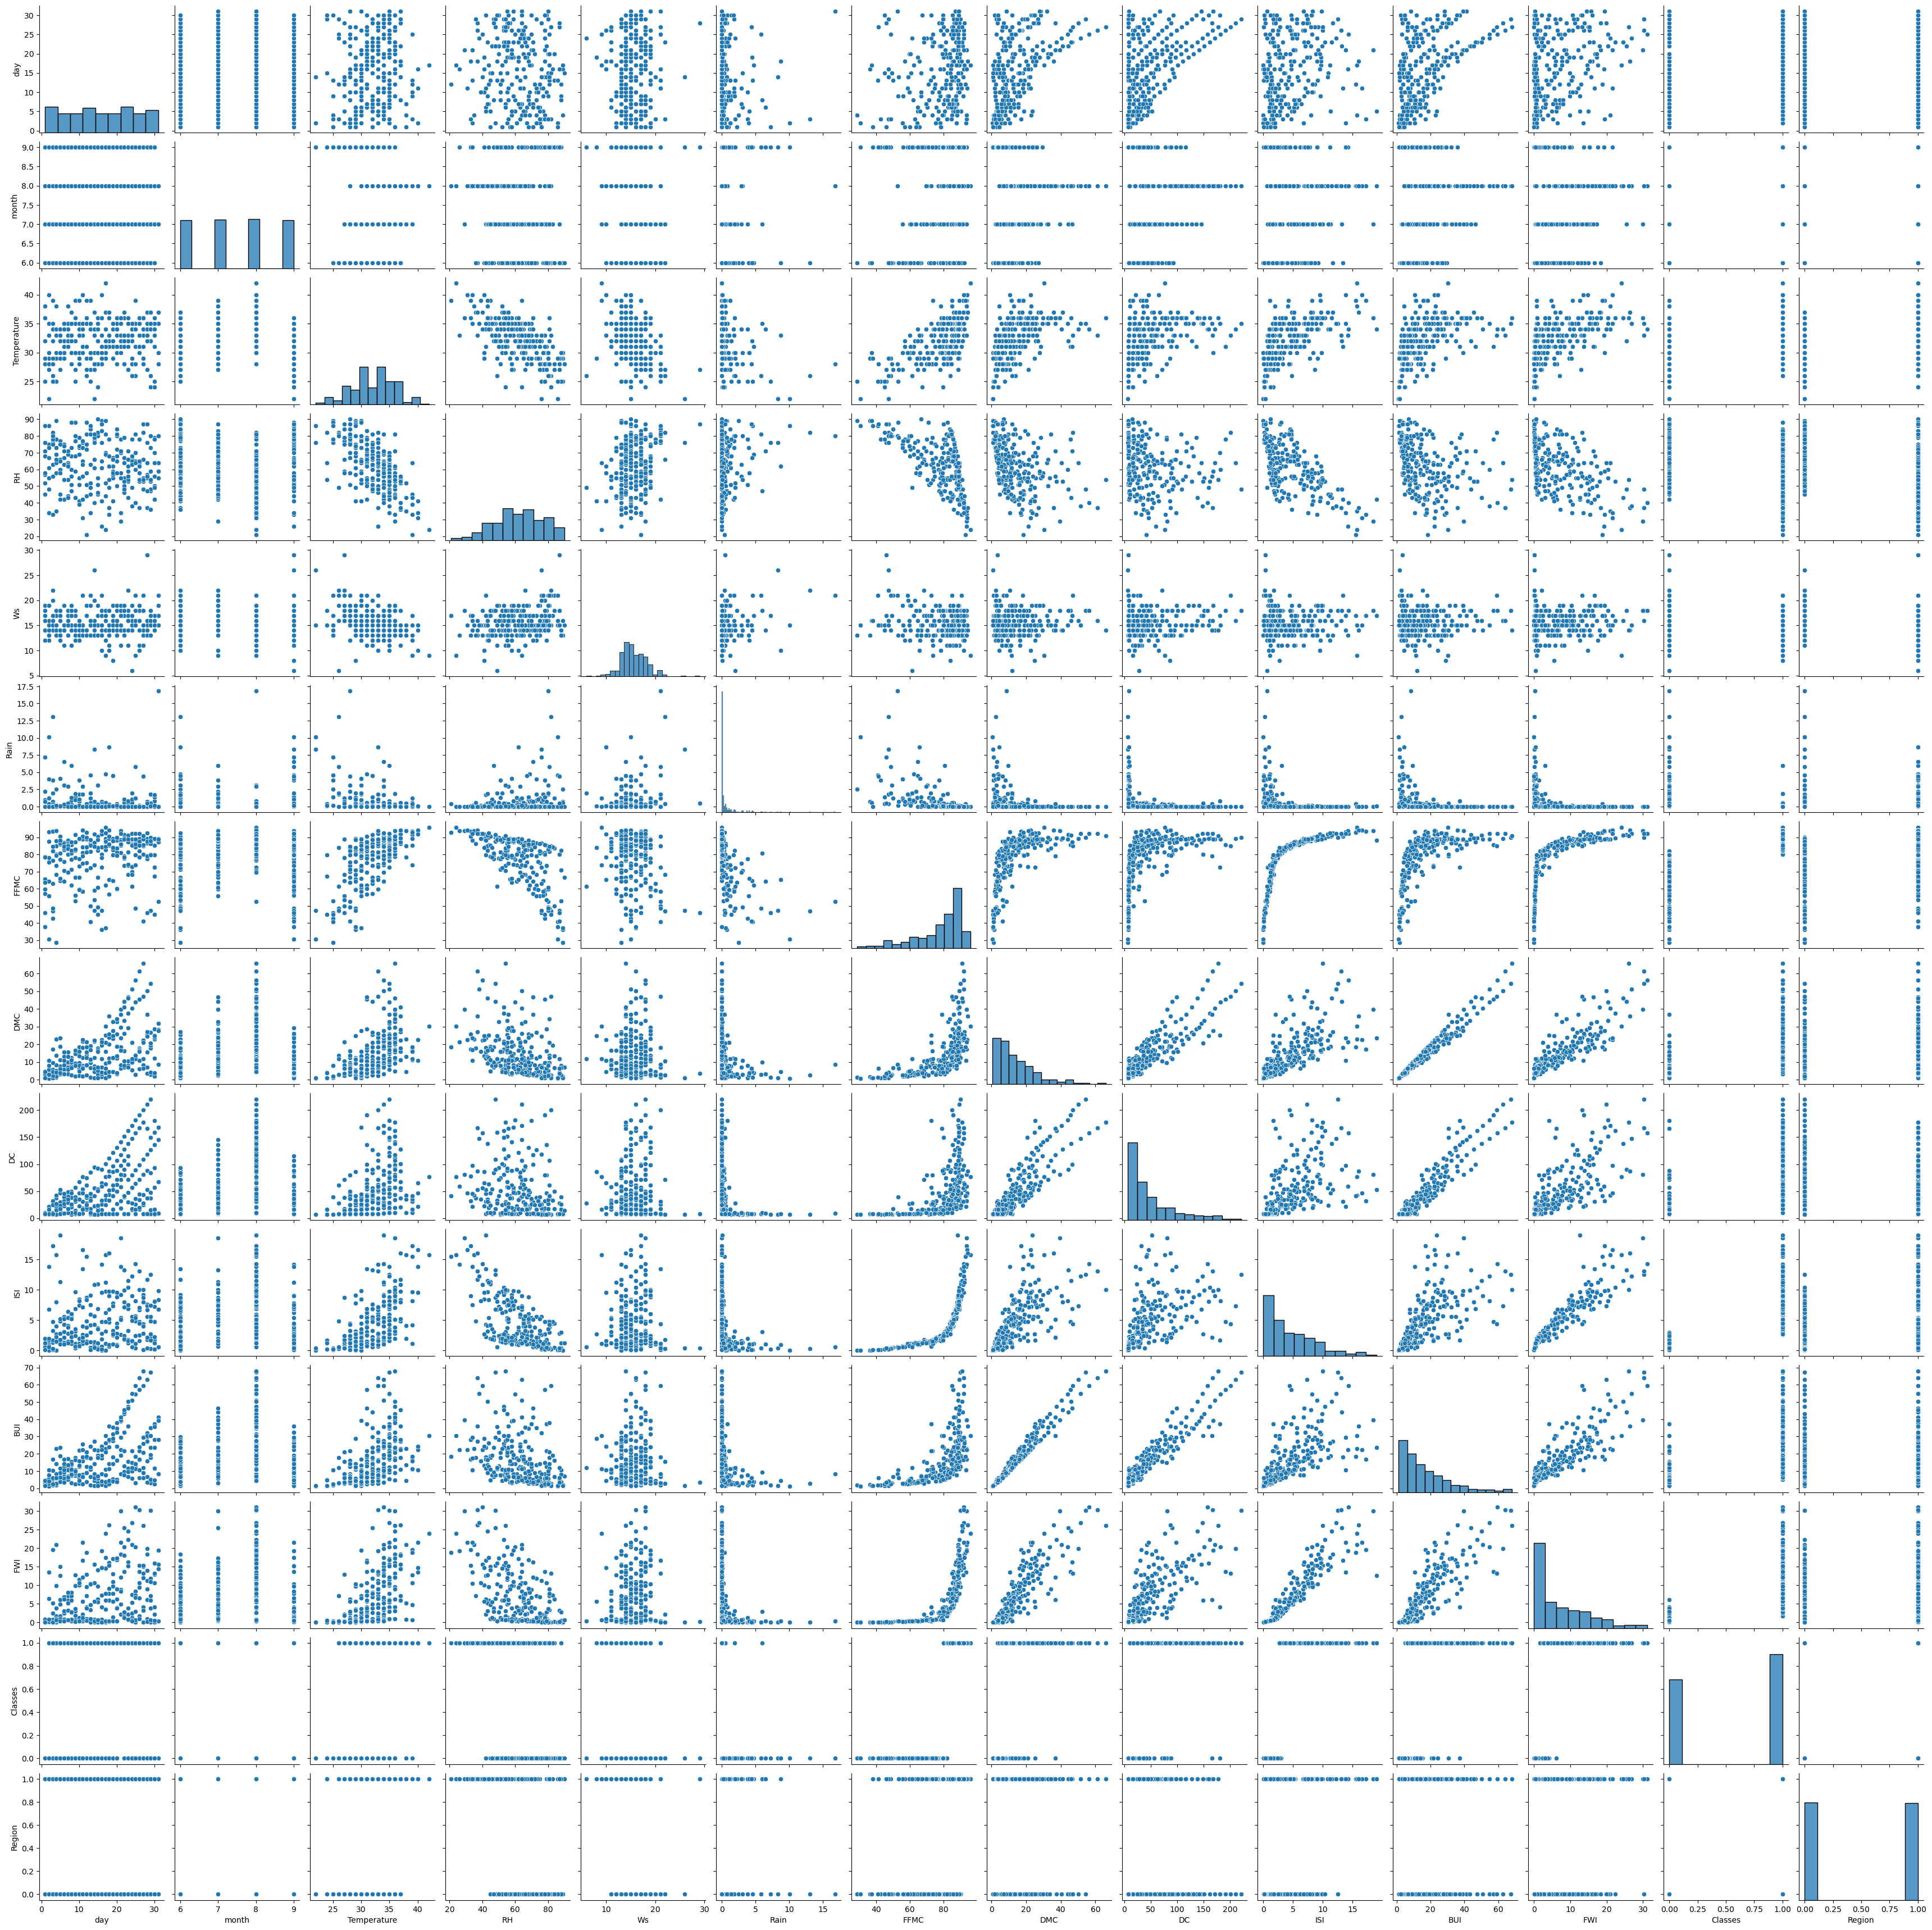

In [156]:
sns.pairplot(df)

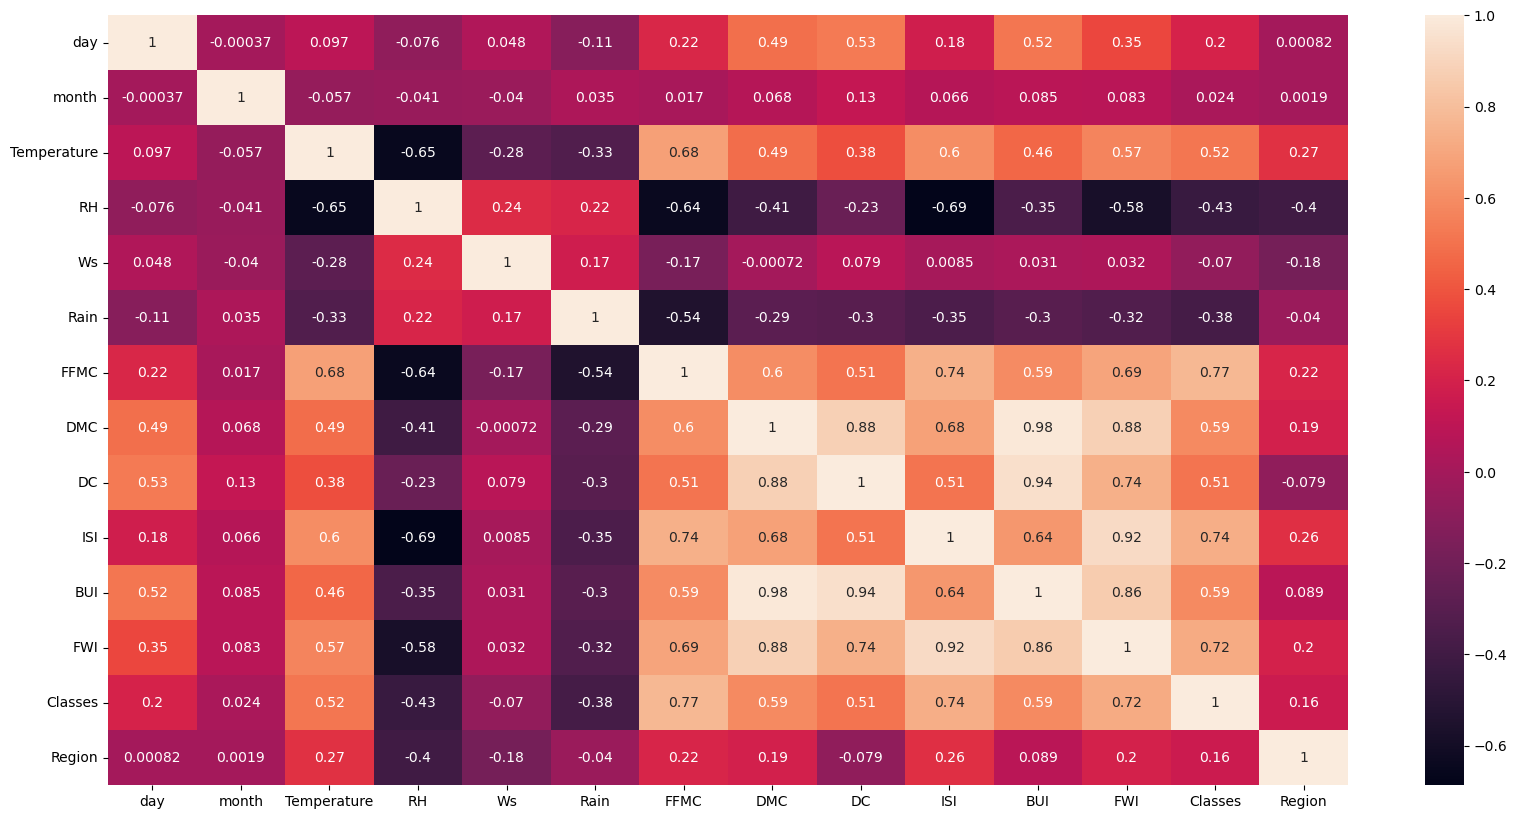

In [188]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

### Observations
 - Classes have a negative correlation with RH,Rain and high positive correlation with Temperature,FFMC,DMC,ISI,FWI
 - Rain has a negative corrrelation with Temperature,FFMC and ISI
 - RH has a negative correlation with FFMC and ISI

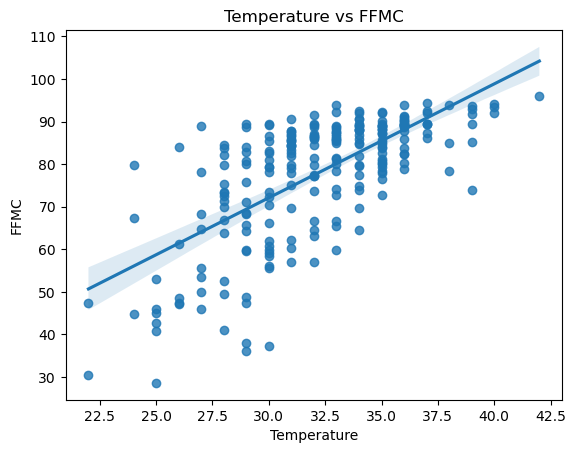

In [207]:
sns.regplot(data = df,x = 'Temperature',y = 'FFMC')
plt.title("Temperature vs FFMC")
plt.show()

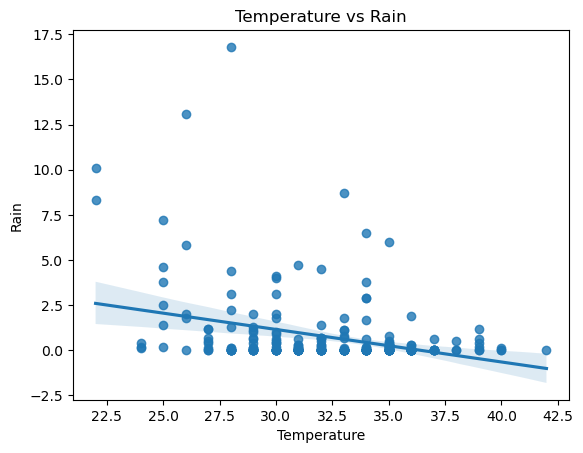

In [208]:
sns.regplot(data = df,x = "Temperature",y ="Rain")
plt.title("Temperature vs Rain")
plt.show()

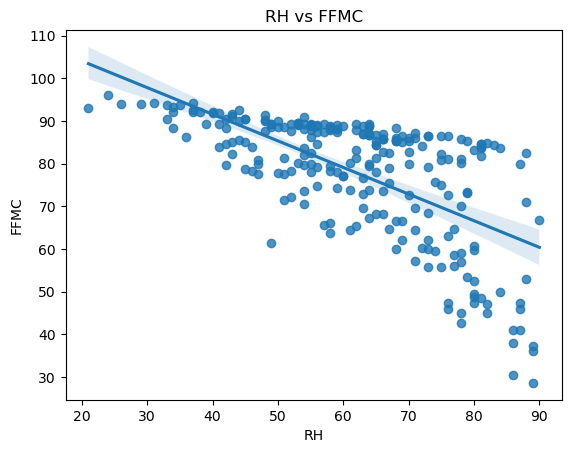

In [209]:
sns.regplot(data=df,x = 'RH',y = 'FFMC')
plt.title("RH vs FFMC")
plt.show()

<Axes: xlabel='FFMC', ylabel='ISI'>

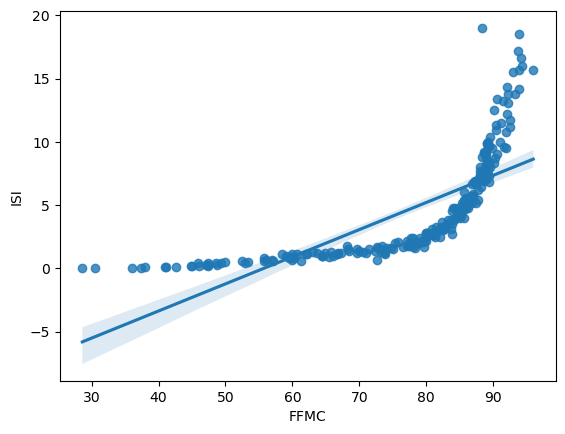

In [205]:
sns.regplot(data = df,x = 'FFMC',y ='ISI')

### 4.2.2 Getting the data separated with respect to Classes 1 and 0

In [245]:
# getting the Fire dataset
df1 = df[df.Classes==1]
df1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
5,6,6,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0
6,7,6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0
7,8,6,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0
10,11,6,31,65,14,0.0,84.5,12.5,54.3,4.0,15.8,5.6,1,0
11,12,6,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,1,0


In [246]:
df1.reset_index(inplace = True,drop = True)
df1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,6,6,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0
1,7,6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0
2,8,6,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0
3,11,6,31,65,14,0.0,84.5,12.5,54.3,4.0,15.8,5.6,1,0
4,12,6,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,1,0


### Checking in which out of the 2 regions more fire has occured

In [252]:
df1.Region.value_counts(normalize = True)*100

1    56.934307
0    43.065693
Name: Region, dtype: float64

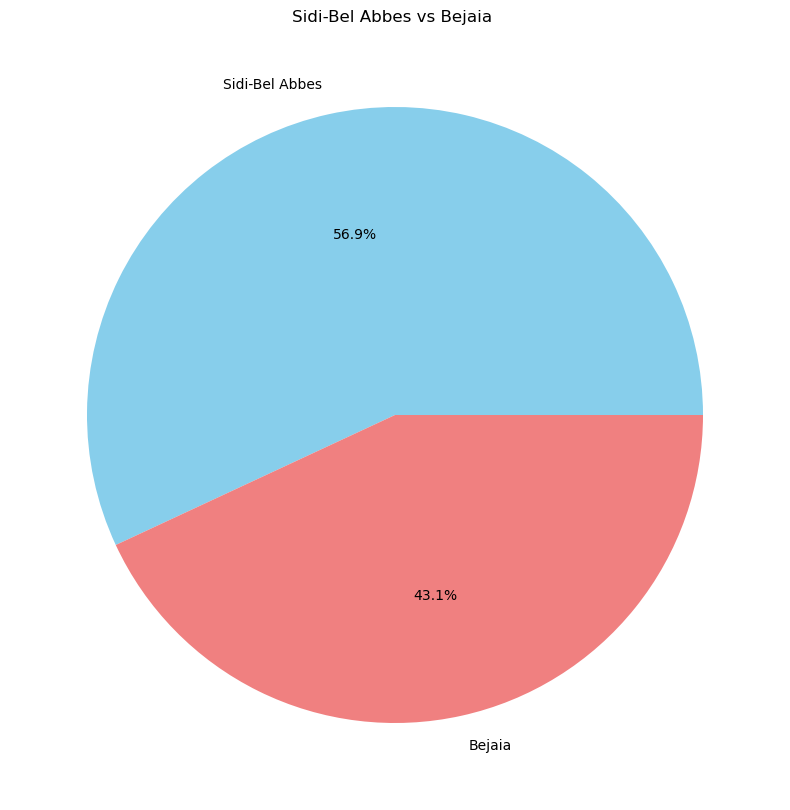

In [261]:
plt.figure(figsize= (20,10))
plt.pie(df1.Region.value_counts(),labels = ['Sidi-Bel Abbes','Bejaia'],autopct='%1.1f%%',colors = ['skyblue', 'lightcoral'])
plt.title("Sidi-Bel Abbes vs Bejaia ")
plt.show()

### Observation
- Sidi-Bel Abbes has more fires caught hat Bejaia region

### checking out the countplot

<Axes: xlabel='month', ylabel='count'>

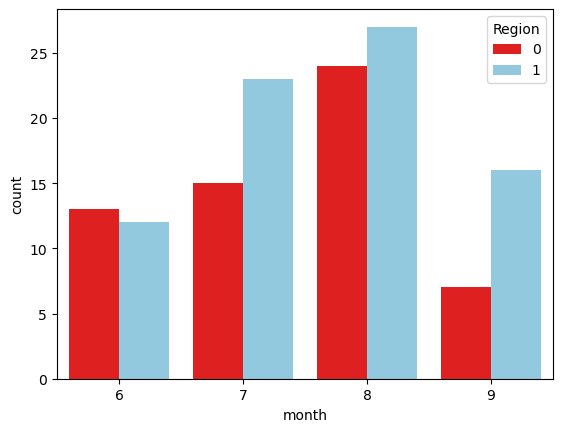

In [284]:
sns.countplot(data=df1, x ='month',hue = "Region",palette=['red', 'skyblue'] )

#### Observation
- Clearly 8 month has caused the most number of fires
- In case of month 9 relatively region 1 has more fires
- In case of month 7 region 1 has relatively more fires

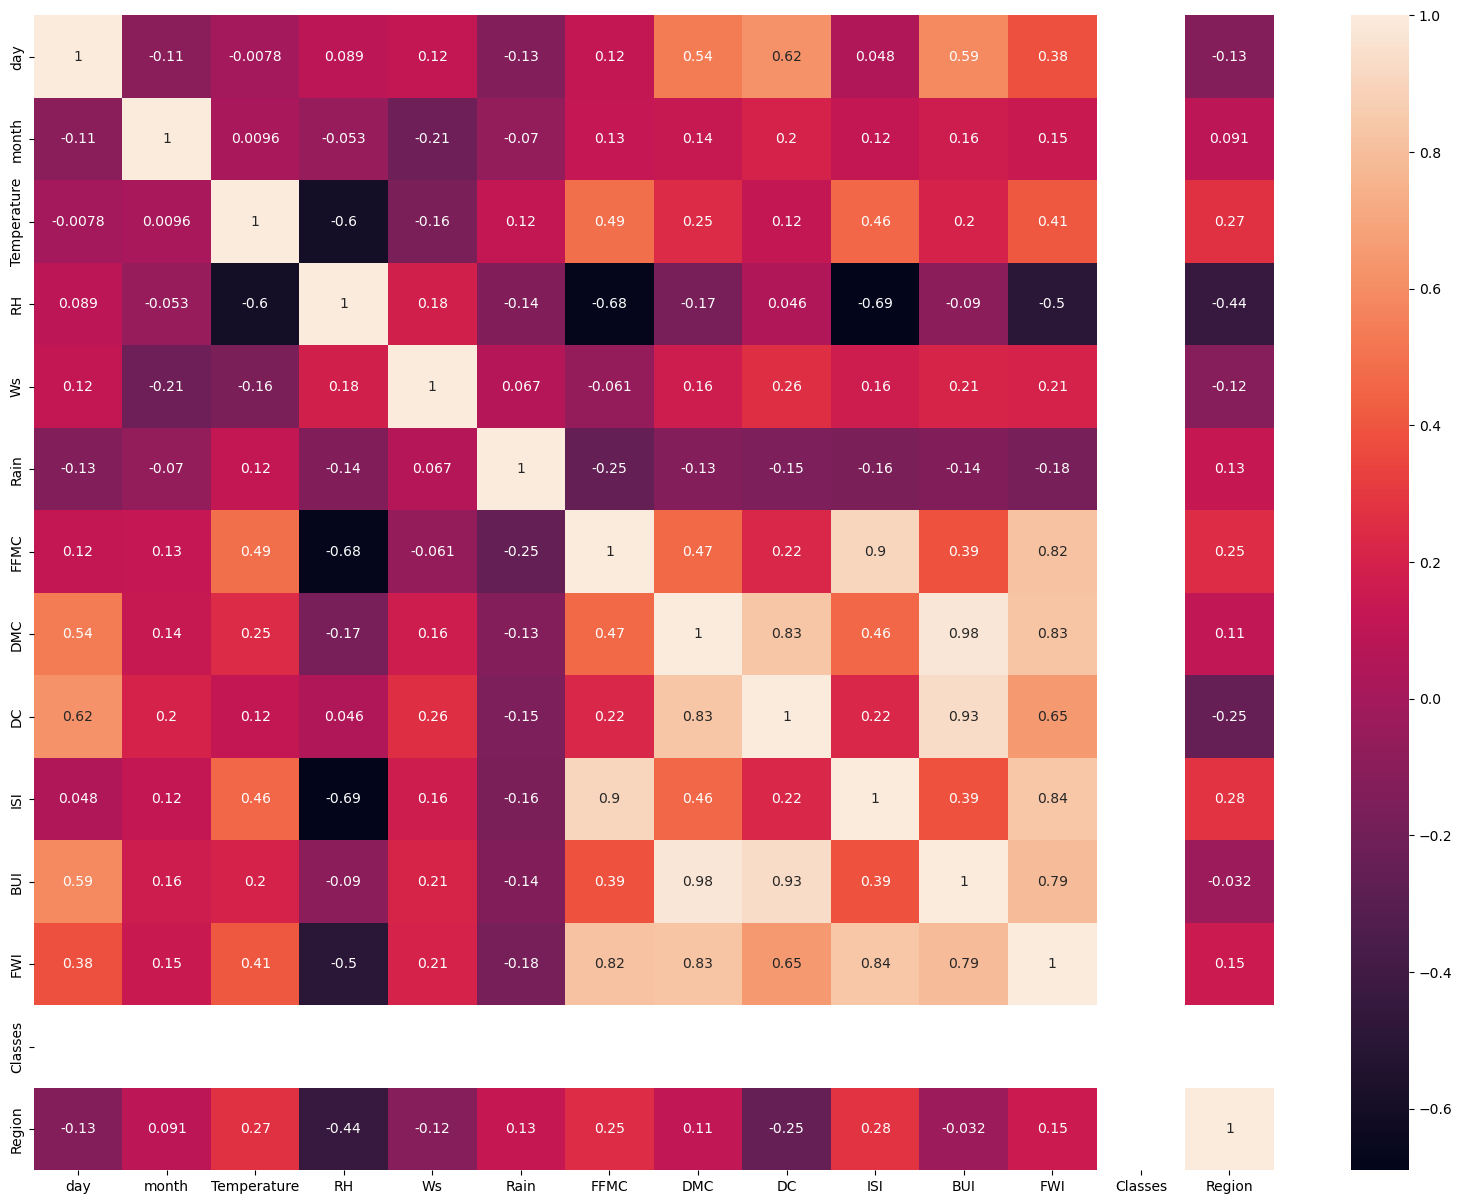

In [305]:
plt.figure(figsize = (20,15))
sns.heatmap(df1.corr(),annot=True)
plt.show()

### Observation 
- BUI is positively related with DMC,DC and FWI
- Temperature is positively related with FWI and ISI
- Rain is negatively related with all the FWI components

<Axes: xlabel='month', ylabel='Temperature'>

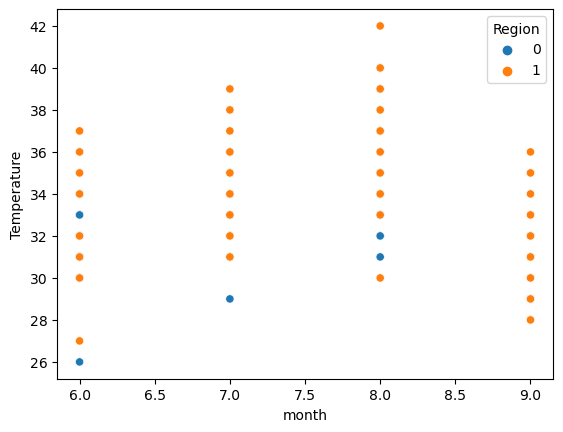

In [300]:
sns.scatterplot(df1,x = 'month',y = 'Temperature',hue  ="Region")

- Observation- Clearly the temperature in case of month 8 is greater and this is affecting the number of fires in both the region

## Report
- By checking out the graphs we can say that temperature do affect the forest fires that has been happening
- Rain also do affect the forest fires and has a negative correlation with all the FWI components
- Temperature is somewhat positively correlated with all the FWI(Fires Weather Index) components.
